# K-Nearest Neighbour (KNN) Imputation

Datasets may have missing values, and this can cause problems for many machine learning algorithms. As such, it is good practice to identify and replace missing values for each column in your input data prior to modeling your prediction task. This is called missing data imputation, or imputing for short. A popular approach to missing data imputation is to use a model to predict the missing values. This requires a model to be created for each input variable that has missing values. Although any one among a range of different models can be used to predict the missing values, the $k$-nearest neighbour (KNN) algorithm has proven to be generally effective, often referred to as nearest neighbour imputation. In this exercise, you will discover how to use nearest neighbour imputation strategies for missing data in machine learning. After completing
this exercise, you will know:
- Missing values must be marked with NaN values and can be replaced with nearest neighbour estimated values.
- How to load a CSV file with missing values and mark the missing values with NaN values and report the number and percentage of missing values for each column.
- How to impute missing values with nearest neighbour models as a data preparation method when evaluating models and when fitting a final model to make predictions on new data.

---

## 1. Exercise Overview

This exercise is divided into three parts; they are:
1. $k$-nearest neighbour Imputation
2. Horse Colic Dataset
3. Nearest neighbour Imputation With KNNImputer

---

## 2. $k$-nearest neighbour Imputation

A dataset may have missing values. These are rows of data where one or more values or columns in that row are not present. The values may be missing completely or they may be marked with a special character or value, such as a question mark ("?"). Values could be missing for many reasons, often specific to the problem domain, and might include reasons such as corrupt measurements or unavailability. Most machine learning algorithms require numeric input values, and a value to be present for each row and column in a dataset. As such, missing values can cause problems for machine learning algorithms. It is common to identify missing values in a dataset and replace them with a numeric value. This is called data imputing, or missing data
imputation.

An effective approach to data imputing is to use a model to predict the missing values. A model is created for each feature that has missing values, taking as input values of perhaps all other input features.

One popular technique for imputation is a $k$-nearest neighbour model. A new sample is imputed by finding the samples in the training set "closest" to it and averages these nearby points to fill in the value.

If input variables are numeric, then regression models can be used for prediction, and this case is quite common. A range of different models can be used, although a simple $k$-nearest neighbour (KNN) model has proven to be effective in experiments. The use of a KNN model to predict or fill missing values is referred to as Nearest neighbour Imputation or KNN imputation.

Configuration of KNN imputation often involves selecting the distance measure (e.g. Euclidean) and the number of contributing neighbours for each prediction, the $k$ hyperparameter of the KNN algorithm. Now that we are familiar with nearest neighbour methods for missing value imputation, let's take a look at a dataset with missing values.

---

## 3. Horse Colic Dataset

We will use the same horse colic dataset as before.

- Load the dataset, and summarize the number and percentage of missing values. You may refer to the previous example.

  Expected output:
  ```
  > 0, Missing: 1 (0.3%)
  > 1, Missing: 0 (0.0%)
  > 2, Missing: 0 (0.0%)
  > 3, Missing: 60 (20.0%)
  > 4, Missing: 24 (8.0%)
  > 5, Missing: 58 (19.3%)
  > 6, Missing: 56 (18.7%)
  > 7, Missing: 69 (23.0%)
  > 8, Missing: 47 (15.7%)
  > 9, Missing: 32 (10.7%)
  > 10, Missing: 55 (18.3%)
  > 11, Missing: 44 (14.7%)
  > 12, Missing: 56 (18.7%)
  > 13, Missing: 104 (34.7%)
  > 14, Missing: 106 (35.3%)
  > 15, Missing: 247 (82.3%)
  > 16, Missing: 102 (34.0%)
  > 17, Missing: 118 (39.3%)
  > 18, Missing: 29 (9.7%)
  > 19, Missing: 33 (11.0%)
  > 20, Missing: 165 (55.0%)
  > 21, Missing: 198 (66.0%)
  > 22, Missing: 1 (0.3%)
  > 23, Missing: 0 (0.0%)
  > 24, Missing: 0 (0.0%)
  > 25, Missing: 0 (0.0%)
  > 26, Missing: 0 (0.0%)
  > 27, Missing: 0 (0.0%)
  ```

Now that we are familiar with the horse colic dataset that has missing values, let's look at how we can use nearest neighbour imputation.

---

## 4. Nearest neighbour Imputation with `KNNImputer`

The scikit-learn machine learning library provides the `KNNImputer` class that supports nearest neighbour imputation. In this section, we will explore how to effectively use the `KNNImputer` class.

### 4.1. `KNNImputer` Data Transform

The KNNImputer is a data transform that is first configured based on the method used to estimate the missing values. The default distance measure is a Euclidean distance measure that is NaN aware, e.g. will not include NaN values when calculating the distance between members of the training dataset. This is set via the `metric` argument. The number of neighbours is set to five by default and can be configured by the `n_neighbors` argument.

Finally, the distance measure can be weighed proportional to the distance between instances (rows), although this is set to a uniform weighting by default, controlled via the `weights` argument.

```python
'''Example of defining a KNNImputer instance.'''
from sklearn.impute import KNNImputer
...
# define imputer
imputer = KNNImputer(n_neighbours=5, weights='uniform', metric='nan_euclidean')
```

Then, the imputer is fit on a dataset.

```python
'''Example of fitting a KNNImputer instance.'''
...
# fit on the dataset
imputer.fit(X)
```

Then, the fit imputer is applied to a dataset to create a copy of the dataset with all missing values for each column replaced with an estimated value.

```python
'''Example of using a KNNImputer instance to transform a dataset.'''
from numpy import isnan
...
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))
```

We can demonstrate its usage on the horse colic dataset and confirm it works by summarizing the total number of missing values in the dataset before and after the transform.

- Demonstrate the usage of `KNNImputer` on the horse colic dataset and confirm it works by summarizing the total number of missing values in the dataset before and after the transform. (Answer: Before 1605, After 0)

Running the example first loads the dataset and reports the total number of missing values in the dataset as 1,605. The transform is configured, fit, and performed, and the resulting new dataset has no missing values, confirming it was performed as we expected. Each missing value was replaced with a value estimated by the model.

## 4.2. `KNNImputer` and Model Evaluation

It is a good practice to evaluate machine learning models on a dataset using $k$-fold cross-validation. To correctly apply nearest neighbour missing data imputation and avoid data leakage, it is required that the models calculated for each column are calculated on the training dataset only, then applied to the train and test sets for each fold in the dataset. This can be achieved by creating a modeling pipeline where the first step is the nearest neighbour imputation, then the second step is the model. We will implement this using the `Pipeline` class. For example, the `Pipeline` below uses a `KNNImputer` with the default strategy, followed by a random forest model.

```python
'''Example of defining a KNNImputer Pipeline to evaluate a model.'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
...
# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
```

- Evaluate the imputed dataset and random forest modeling pipeline for the horse colic dataset with repeated stratified 10-fold cross-validation. (Answer: 85.778% (6.321))

  Use `n_repeats=3` and `random_state=1` for the `RepeatedStratifiedKFold` parameters. You may refer to the previous exercise example to define the cross-validation.

  Note: Your specific results may vary given the stochastic nature of the learning algorithm, the evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average performance.

Running the example correctly applies data imputation to each fold of the cross-validation procedure.

The pipeline is evaluated using three repeats of 10-fold stratified cross-validation and reports the mean classification accuracy on the dataset as about 86 percent, which is a reasonable score.

How do we know that using a default number of neighbours of five is good or best for this dataset?

The answer is that we don't.

## 4.3. `KNNImputer` and Different Number of Neighbors

The key hyperparameter for the KNN algorithm is $k$; that controls the number of nearest neighbours that are used to contribute to a prediction. It is good practice to test a suite of different values for $k$.

- Using `neighbors = [1,3,5,7,9,15,18,21]`, evaluate the model for each value of $k$.

  Expected results:
  ```
  >1 86.222% (5.493)
  >3 86.667% (5.443)
  >5 86.667% (5.837)
  >7 86.444% (5.439)
  >9 86.333% (5.601)
  >15 86.111% (5.381)
  >18 86.111% (5.098)
  >21 85.889% (5.817)
  ```
  <br>
  You should also append the scores to a list results, this will be used later for analysis.
  
  Note: Your specific results may vary given the stochastic nature of the learning algorithm, the evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average performance.

Running the example evaluates each $k$ value on the horse colic dataset using repeated cross-validation.

The mean classification accuracy is reported for the pipeline with each k value used for imputation. In this case, we can see that larger k values result in a better performing model, with a $k = 5$ resulting in the best performance of about 86.7 percent accuracy.

At the end of the run, a box and whisker plot should be created for each set of results. This allows the distribution of results to be compared.

- Using the list of scores stored in results, plot a box and whisker plot for each strategy.

  Expected result (Note: results may differ)
  
  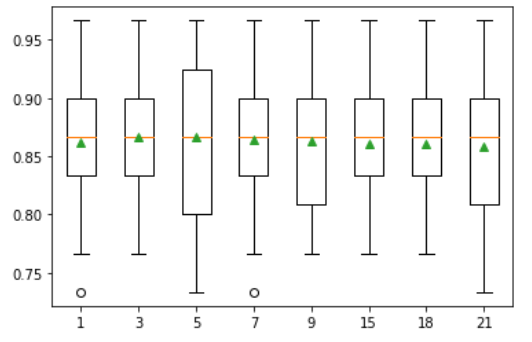

The plot suggest that there is not much difference in the $k$ value when imputing the missing values, with minor fluctuations around the mean performance (green triangle).

### 4.4. `KNNImputer` Transform When Making a Prediction

We may wish to create a final modeling pipeline with the nearest neighbour imputation and random forest algorithm, then make a prediction for new data. This can be achieved by defining the pipeline and fitting it on all available data, then calling the `predict()` function, passing new data in as an argument. Importantly, the row of new data must mark any missing values using the NaN value.

In [ ]:
from numpy import nan
# define new data with missing values
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00,
8.40, nan, nan, 2, 11300, 00000, 00000, 2]

- Using the `KNNImputer` hyperparameter `n_neighbours=21`, make a prediction of the above data `row`. (Answer: Predicted Class 2)

Running the example fits the modeling pipeline on all available data. A new row of data is defined with missing values marked with NaNs and a classification predicts that the class is 2.

---

## 5. References

- Imputation of missing values, scikit-learn Documentation.  
  https://scikit-learn.org/stable/modules/impute.html
- sklearn.impute.KNNImputer API.  
  https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html


---

## 6. Summary

In this exercise, you discovered how to use nearest neighbour imputation strategies for missing data in machine learning. Specifically, you learned:
- Missing values must be marked with NaN values and can be replaced with nearest neighbour estimated values.
- How to load a CSV file with missing values and mark the missing values with NaN values and report the number and percentage of missing values for each column.
- How to impute missing values with nearest neighbour models as a data preparation method when evaluating models and when fitting a final model to make predictions on new data.